# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor



## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [2]:
# Importing the file porter_data_1.csv

porterData=pd.read_csv(r'C:\Users\OneDrive\Desktop\sgupta\porter_data_1.csv')
porterData.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [3]:
porterData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [4]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
porterData['created_at'] = pd.to_datetime(porterData['created_at'])
porterData['actual_delivery_time'] = pd.to_datetime(porterData['actual_delivery_time'])


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [5]:
# Convert categorical features to category type
#market_id,store_primary_category,order_protocol
porterData['market_id'].value_counts()
porterData['market_id'] = porterData['market_id'].astype('category')
porterData['market_id'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 175777 entries, 0 to 175776
Series name: market_id
Non-Null Count   Dtype   
--------------   -----   
175777 non-null  category
dtypes: category(1)
memory usage: 172.0 KB


In [6]:
porterData['order_protocol'].value_counts()
porterData['order_protocol'] = porterData['order_protocol'].astype('category')
porterData['order_protocol'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 175777 entries, 0 to 175776
Series name: order_protocol
Non-Null Count   Dtype   
--------------   -----   
175777 non-null  category
dtypes: category(1)
memory usage: 172.1 KB


In [7]:
porterData['store_primary_category'].describe()
porterData['store_primary_category'] = porterData['store_primary_category'].astype('category')
porterData['store_primary_category'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 175777 entries, 0 to 175776
Series name: store_primary_category
Non-Null Count   Dtype   
--------------   -----   
175777 non-null  category
dtypes: category(1)
memory usage: 174.4 KB


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [8]:
# Calculate time taken in minutes
porterData['time_taken_minutes']=(porterData['actual_delivery_time'] - porterData['created_at']).dt.total_seconds() / 60
porterData.head(5)


market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken_minutes  
0                      21.0     34.44                47.0  
1                       2.0     27.60                44.0  
2                      18.0     11.56                55.0  
3                       8.0     31.80                59.0  
4                       7.0      8.20                46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [9]:
# Extract the hour and day of week from the 'created_at' timestamp
porterData['hour'] = porterData['created_at'].dt.hour
porterData['day_of_week'] = porterData['created_at'].dt.day_name()
# Create a categorical feature 'isWeekend'
porterData['isWeekend'] = porterData['created_at'].dt.dayofweek.isin([5, 6])  # 5=Saturday, 6=Sunday
porterData['isWeekend'] = porterData['isWeekend'].map({True: 1, False: 0})
porterData.head(5)

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken_minutes  hour day_of_week  \
0                      21.0     34.44                47.0    22      Friday   
1                       2.0     27.60                44.0    21     Tuesday   
2                      18.0     11.56                55.0     0      Monday   
3                       8.0     31.80                59.0     3    Thursday   
4                       7.0      8.20                46.0     2     Tuesday   

   isWeekend  
0          0  
1          0  
2          0  
3          0  
4          0

In [10]:
# Drop unnecessary columns
porterData = porterData.drop(columns=['created_at','actual_delivery_time','day_of_week'])
porterData.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
0       1.0                      4            1.0            4      3441   
1       2.0                     46            2.0            1      1900   
2       2.0                     36            3.0            4      4771   
3       1.0                     38            1.0            1      1525   
4       1.0                     38            1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  time_taken_minutes  \
0                14.0                      21.0     34.44                47.0   
1                 2.0                       2.0     27.60                44.0   
2                 6.0                      18.0     11.56                55.0   
3                 6.0                       8.0     31.80                59.0   
4                 5.0                       7.0      8.20                46.0   

   hour  isWeekend  
0    22          0  
1    21          0  
2     0          0  
3     3          0  
4     2          0

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

# Define target variable (y) and features (X)
Target Variable :
    Y= time_taken_minutes
Features :
    X1=market_id (values= 1,2,3,4,5,6)
    X2=order_protocol(values=1,2,3,4,5,6,7)
    X3=total_items
    X4=subtotal
    X5=num_distinct_items
    X6=min_item_price
    X7=max_item_price
    X8=total_onshift_dashers
    X9=total_busy_dashers
    X10=total_outstanding_orders
    X11=distance
    X12=isWeekend
    X13=hour


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

# create  dummy variables
As data is already numeriacal in categorical variable so no need to create dummies

In [11]:
# Split data into training and testing sets

df_train,df_test=train_test_split(porterData,train_size=0.7,random_state=100)
df_train.head(5)

market_id store_primary_category order_protocol  total_items  subtotal  \
94746        4.0                     24            5.0            2      1790   
173338       4.0                     72            5.0            1       845   
37592        4.0                     55            5.0            1      1900   
42763        2.0                     28            4.0            6       463   
27506        2.0                     72            1.0            3      3500   

        num_distinct_items  min_item_price  max_item_price  \
94746                    2             795             995   
173338                   1             795             795   
37592                    1            1200            1200   
42763                    3               0             299   
27506                    3             600            1200   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
94746                    10.0                 9.0                      15.0   
173338                  134.0                76.0                     136.0   
37592                    21.0                21.0                      28.0   
42763                    98.0                87.0                     129.0   
27506                     7.0                13.0                      17.0   

        distance  time_taken_minutes  hour  isWeekend  
94746      18.04                41.0    18          0  
173338     24.28                41.0     2          1  
37592      28.24                44.0    23          1  
42763      13.88                40.0     1          1  
27506       8.00                44.0     5          1

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123043 entries, 94746 to 38408
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 123043 non-null  category
 1   store_primary_category    123043 non-null  category
 2   order_protocol            123043 non-null  category
 3   total_items               123043 non-null  int64   
 4   subtotal                  123043 non-null  int64   
 5   num_distinct_items        123043 non-null  int64   
 6   min_item_price            123043 non-null  int64   
 7   max_item_price            123043 non-null  int64   
 8   total_onshift_dashers     123043 non-null  float64 
 9   total_busy_dashers        123043 non-null  float64 
 10  total_outstanding_orders  123043 non-null  float64 
 11  distance                  123043 non-null  float64 
 12  time_taken_minutes        123043 non-null  float64 
 13  hour                      12304

In [13]:
df_train.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'time_taken_minutes', 'hour',
       'isWeekend'],
      dtype='object')

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [14]:
# Define numerical and categorical columns for easy EDA and data manipulation
df_train.describe()


total_items       subtotal  num_distinct_items  min_item_price  \
count  123043.000000  123043.000000       123043.000000   123043.000000   
mean        3.206082    2697.863625            2.674951      684.784506   
std         2.745043    1830.338637            1.625552      520.731071   
min         1.000000       0.000000            1.000000      -52.000000   
25%         2.000000    1417.000000            2.000000      299.000000   
50%         3.000000    2220.000000            2.000000      595.000000   
75%         4.000000    3405.000000            3.000000      942.000000   
max       411.000000   26800.000000           20.000000    14700.000000   

       max_item_price  total_onshift_dashers  total_busy_dashers  \
count   123043.000000          123043.000000       123043.000000   
mean      1160.434645              44.981177           41.879180   
std        562.955073              34.568806           32.149659   
min          0.000000              -3.000000           -4.000000   
25%        799.000000              17.000000           15.000000   
50%       1095.000000              37.000000           35.000000   
75%       1395.000000              66.000000           63.000000   
max      14700.000000             171.000000          154.000000   

       total_outstanding_orders       distance  time_taken_minutes  \
count             123043.000000  123043.000000       123043.000000   
mean                  58.276651      21.830150           46.192656   
std                   52.689697       8.765038            9.332173   
min                   -6.000000       0.000000           32.000000   
25%                   17.000000      15.320000           39.000000   
50%                   41.000000      21.760000           45.000000   
75%                   85.000000      28.120000           52.000000   
max                  283.000000      83.520000          103.000000   

                hour      isWeekend  
count  123043.000000  123043.000000  
mean        8.467251       0.345960  
std         8.678470       0.475682  
min         0.000000       0.000000  
25%         2.000000       0.000000  
50%         3.000000       0.000000  
75%        19.000000       1.000000  
max        23.000000       1.000000

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

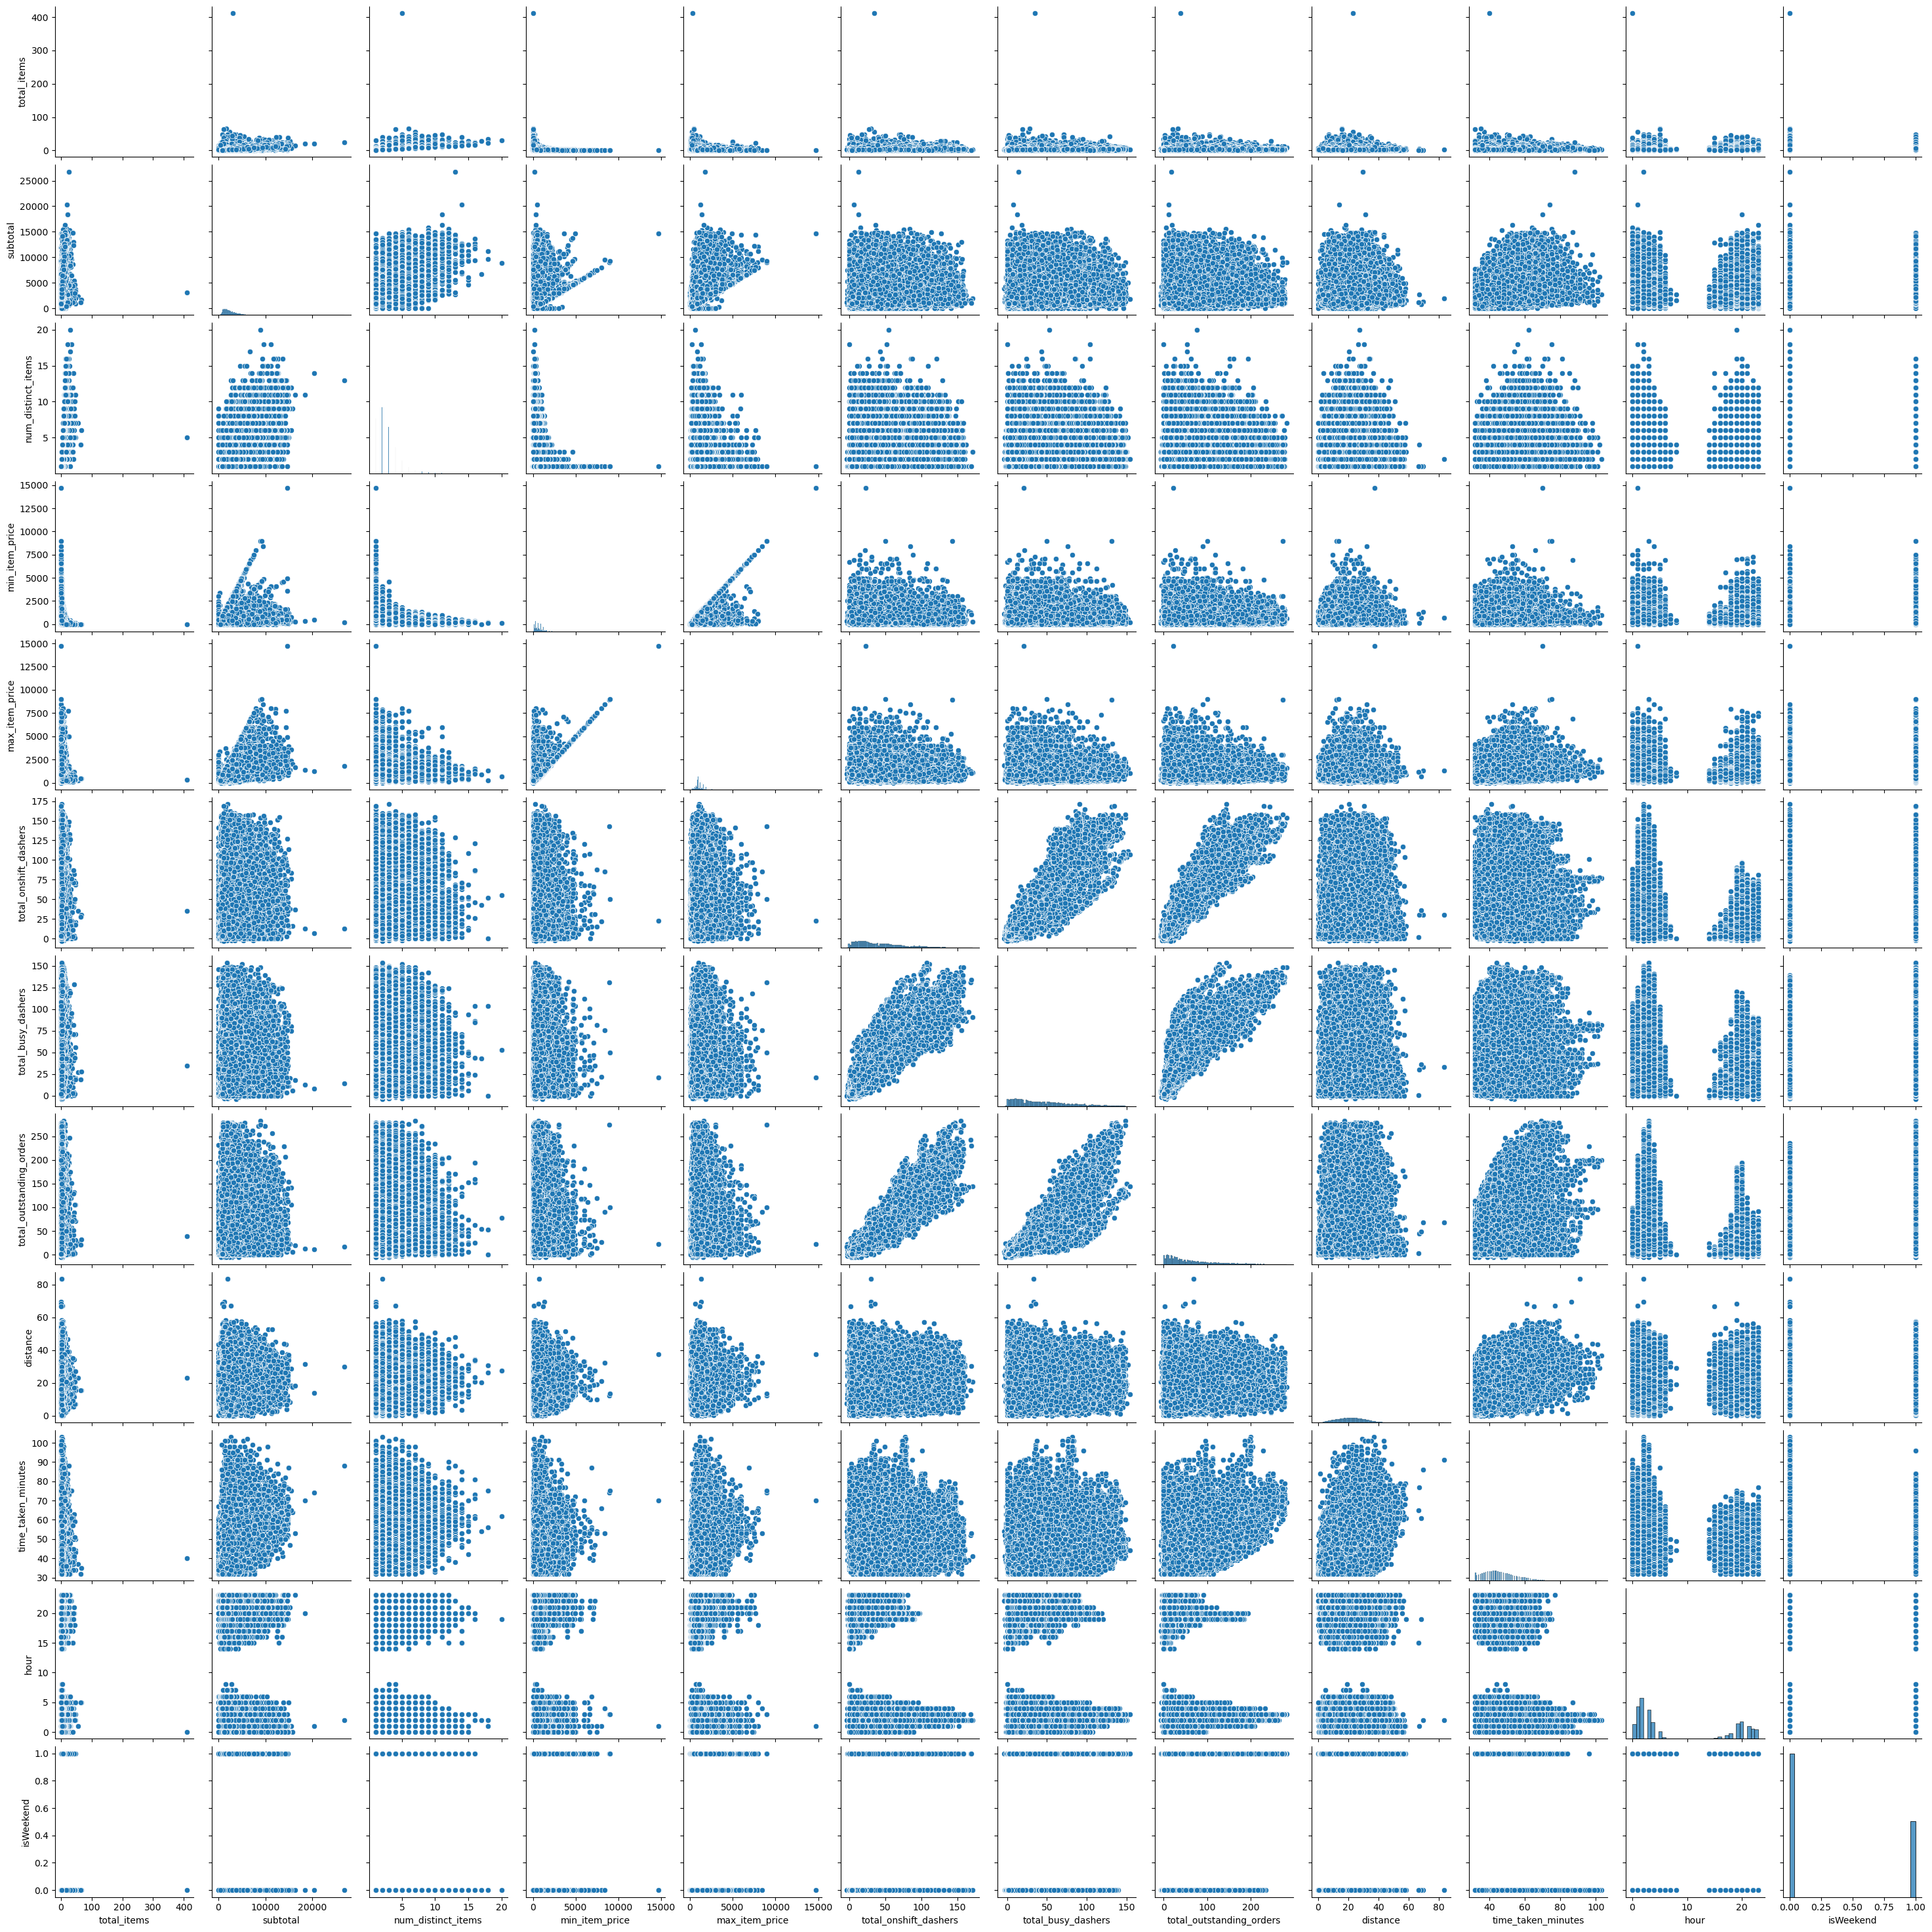

In [15]:
# Plot distributions for all numerical columns
sns.pairplot(data=df_train)
plt.show()


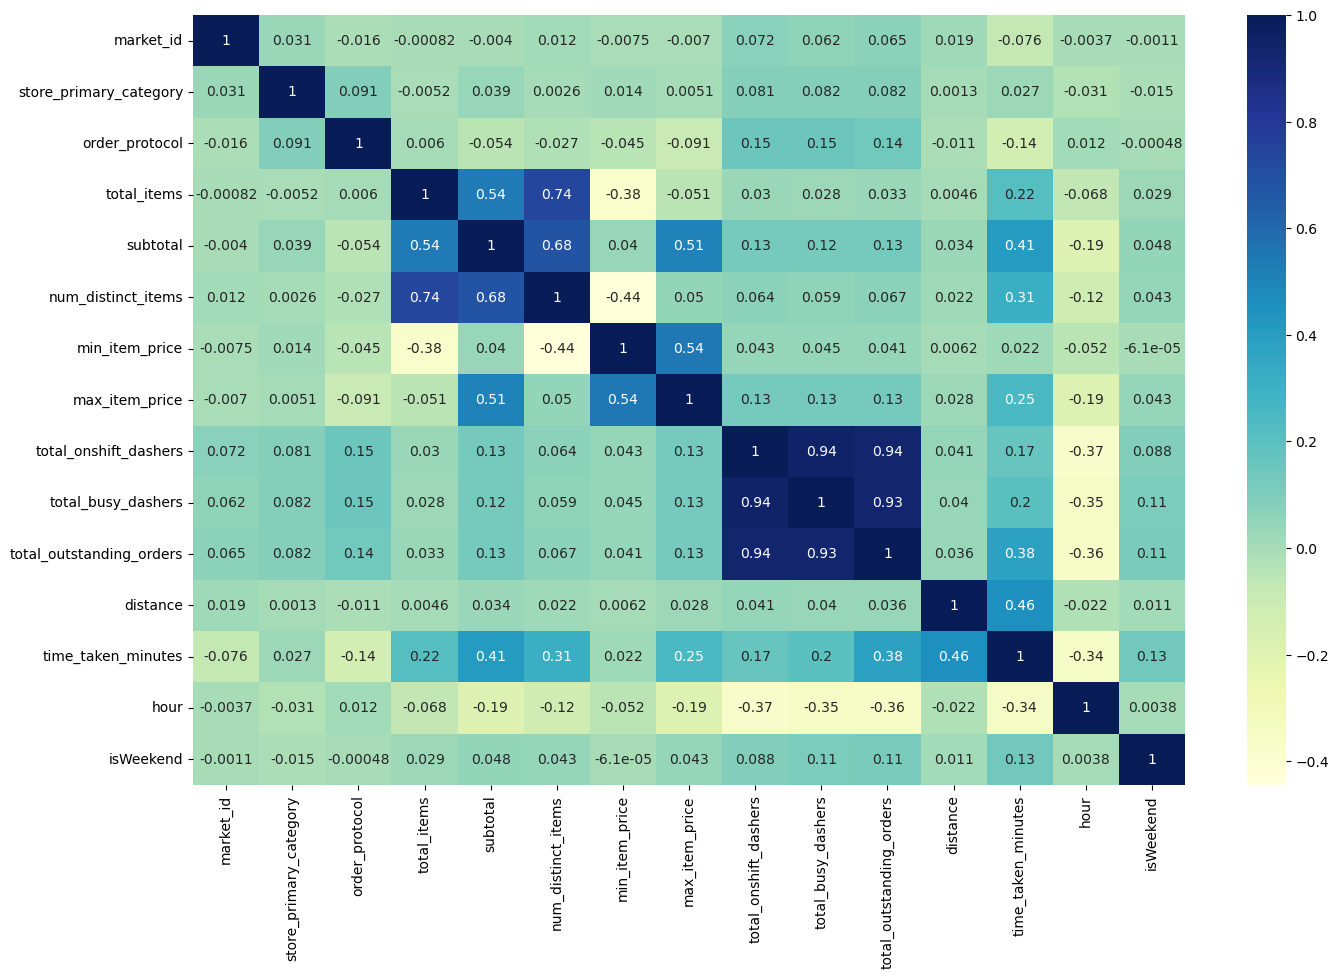

In [16]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [17]:
# Distribution of categorical columns

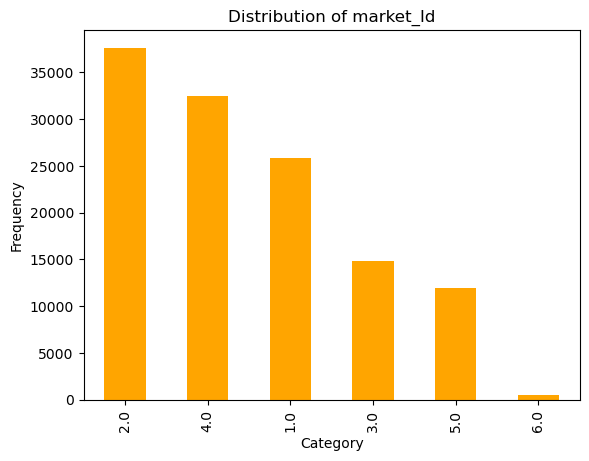

In [18]:
# Distribution of time_taken
df_train['market_id'].value_counts().plot(kind='bar', color='orange', title="Distribution of market_Id")
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

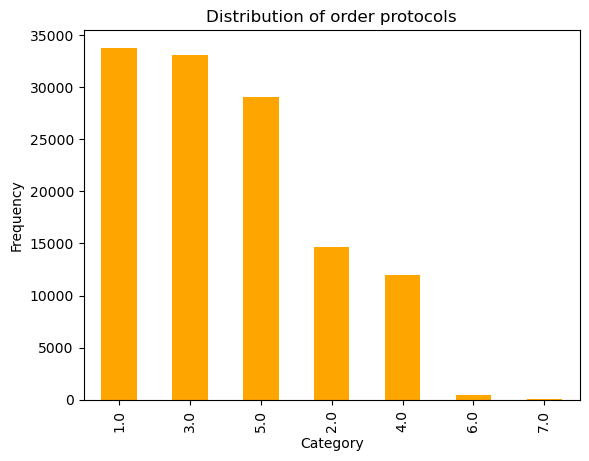

In [19]:
# Distribution of time_taken
df_train['order_protocol'].value_counts().plot(kind='bar', color='orange', title="Distribution of order protocols")
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

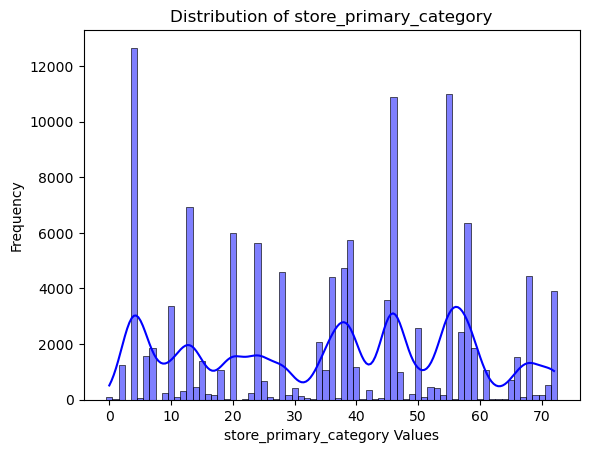

In [20]:
sns.histplot(df_train['store_primary_category'], kde=True, bins=20, color='blue')

# Add labels and title
plt.title('Distribution of store_primary_category')
plt.xlabel('store_primary_category Values')
plt.ylabel('Frequency')
plt.show()

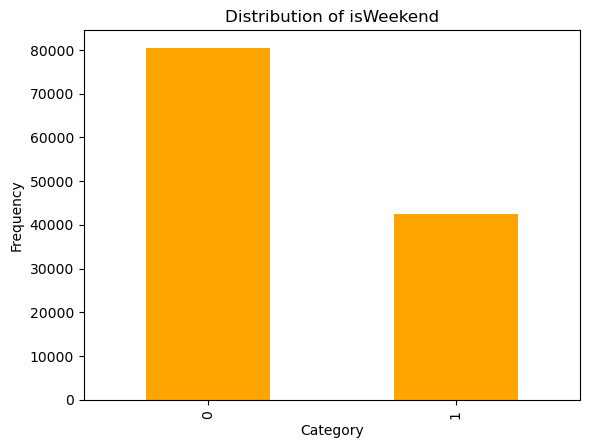

In [21]:
# Distribution of time_taken
df_train['isWeekend'].value_counts().plot(kind='bar', color='orange', title="Distribution of isWeekend")
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

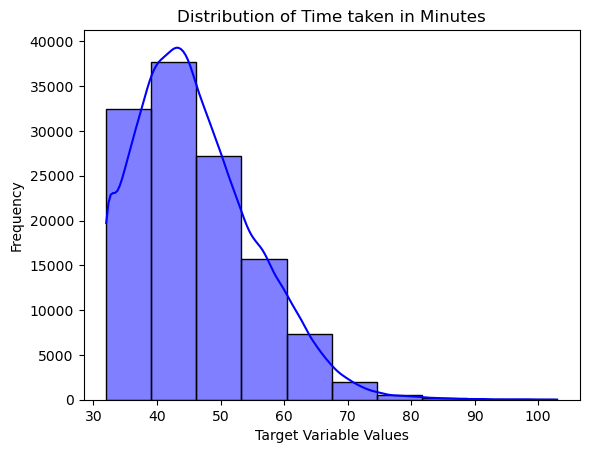

In [22]:
# Distribution of time_taken
sns.histplot(df_train['time_taken_minutes'], kde=True, bins=10, color='blue')

# Add labels and title
plt.title('Distribution of Time taken in Minutes')
plt.xlabel('Target Variable Values')
plt.ylabel('Frequency')
plt.show()


In [23]:
skewness = porterData['time_taken_minutes'].skew()
print(f"Skewness of Target Variable: {skewness}")

Skewness of Target Variable: 0.7621906257372622


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

In [24]:
df_train.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'time_taken_minutes', 'hour',
       'isWeekend'],
      dtype='object')

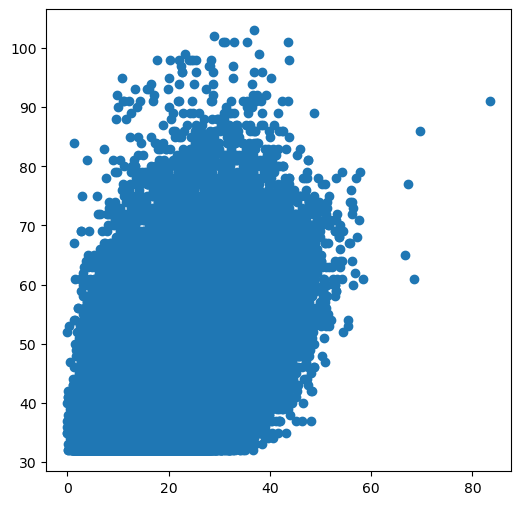

In [15]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=[6,6])
plt.scatter(df_train.distance, df_train.time_taken_minutes)
plt.show()


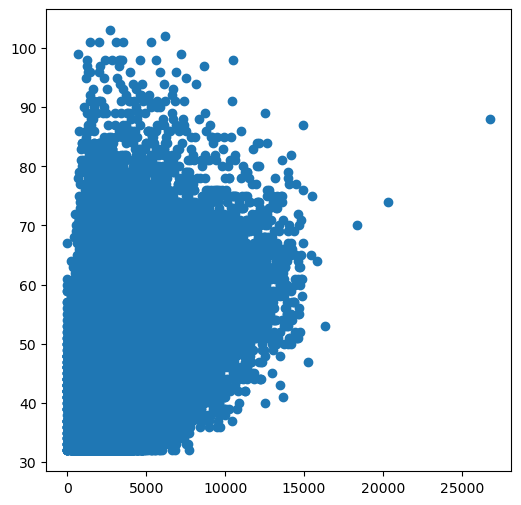

In [16]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=[6,6])
plt.scatter(df_train.subtotal, df_train.time_taken_minutes)
plt.show()

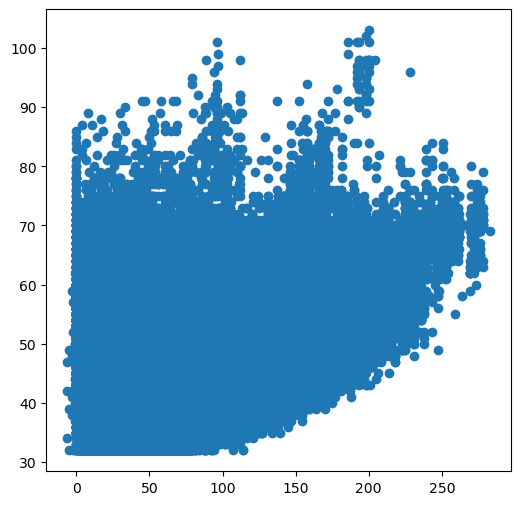

In [17]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=[6,6])
plt.scatter(df_train.total_outstanding_orders, df_train.time_taken_minutes)
plt.show()

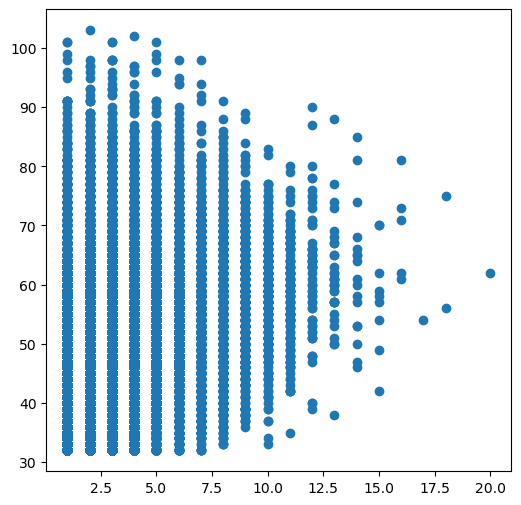

In [18]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=[6,6])
plt.scatter(df_train.num_distinct_items, df_train.time_taken_minutes)
plt.show()

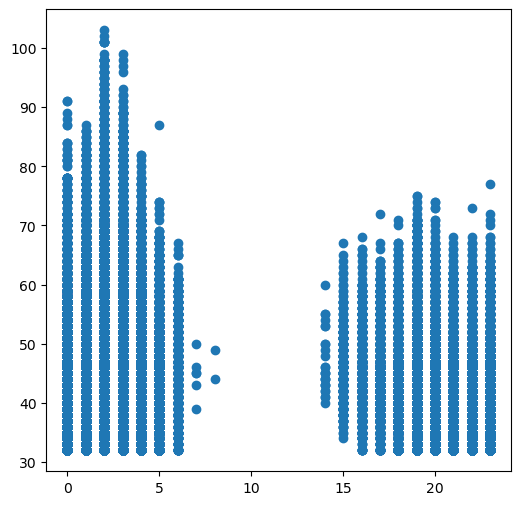

In [19]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=[6,6])
plt.scatter(df_train.hour, df_train.time_taken_minutes)
plt.show()

From the above plots it is clearly seen that distance is highly corelated to time_taken_minute , so we will go with this element

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

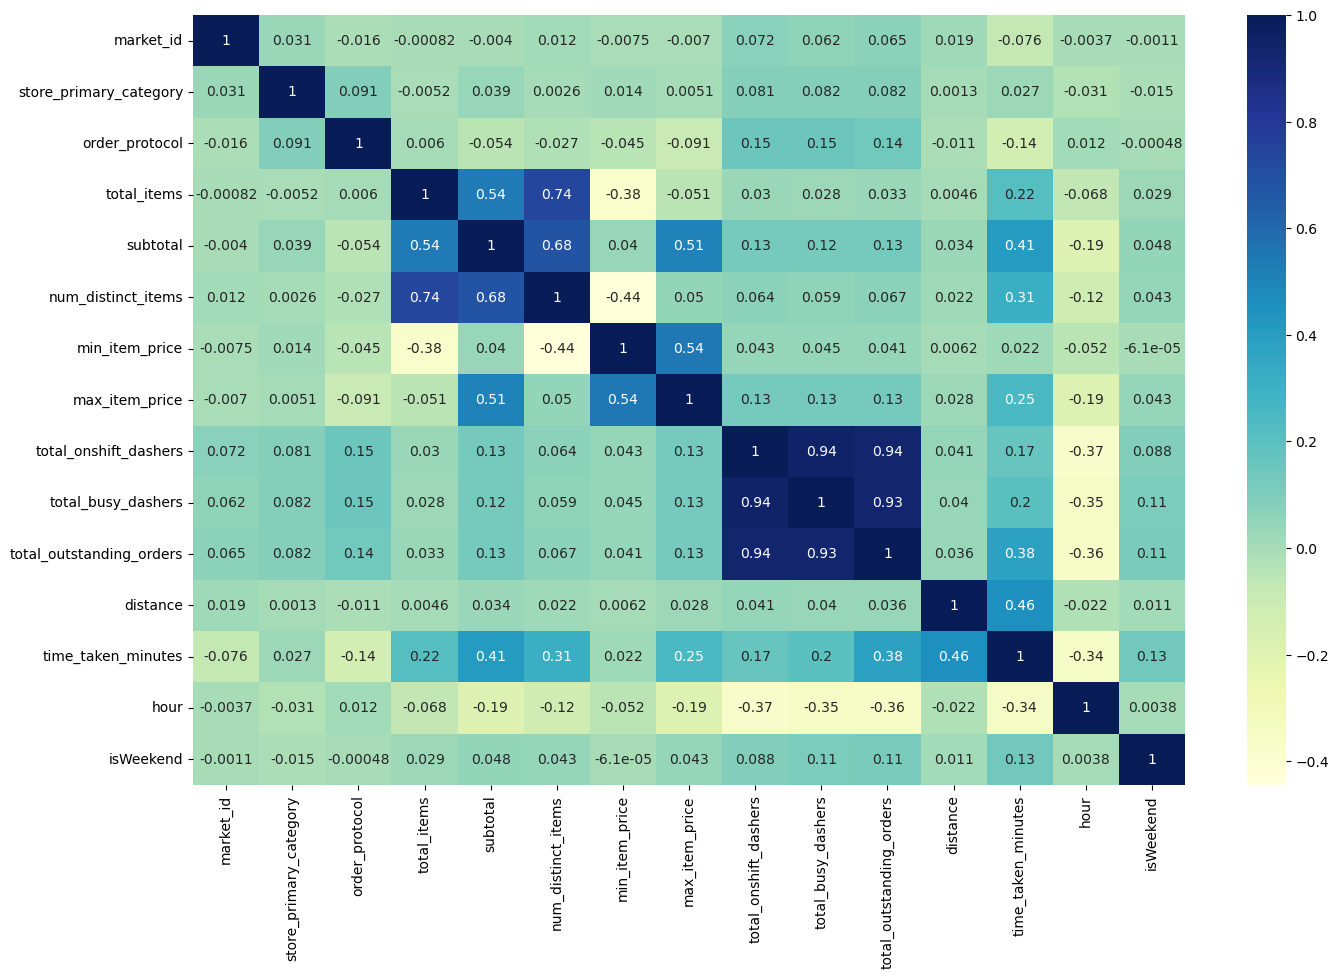

In [27]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable
df_train.columns

In [28]:
# Drop 3-5 weakly correlated columns from training dataset
df_train = df_train.drop(columns=['market_id','store_primary_category','order_protocol','min_item_price','isWeekend'])
df_train.head()


total_items  subtotal  num_distinct_items  max_item_price  \
94746             2      1790                   2             995   
173338            1       845                   1             795   
37592             1      1900                   1            1200   
42763             6       463                   3             299   
27506             3      3500                   3            1200   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
94746                    10.0                 9.0                      15.0   
173338                  134.0                76.0                     136.0   
37592                    21.0                21.0                      28.0   
42763                    98.0                87.0                     129.0   
27506                     7.0                13.0                      17.0   

        distance  time_taken_minutes  hour  
94746      18.04                41.0    18  
173338     24.28                41.0     2  
37592      28.24                44.0    23  
42763      13.88                40.0     1  
27506       8.00                44.0     5

In [29]:
df_train.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'time_taken_minutes', 'hour'],
      dtype='object')

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

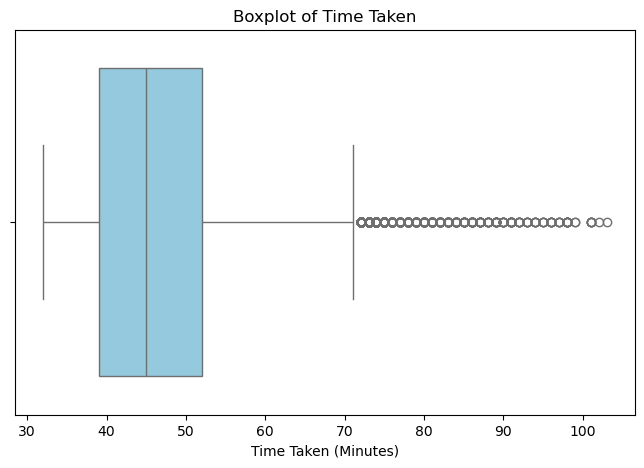

In [30]:
# Create a boxplot for 'time_taken'
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_train['time_taken_minutes'], color='skyblue')
plt.title('Boxplot of Time Taken')
plt.xlabel('Time Taken (Minutes)')
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

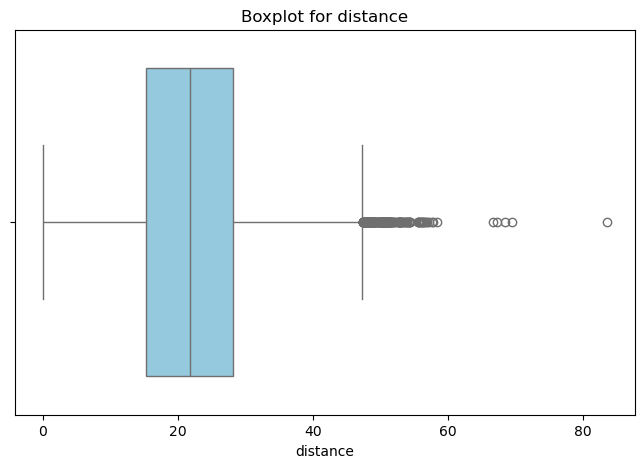

In [31]:
# Handle outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_train['distance'], color='skyblue')
plt.title('Boxplot for distance')
plt.xlabel('distance')
plt.show()


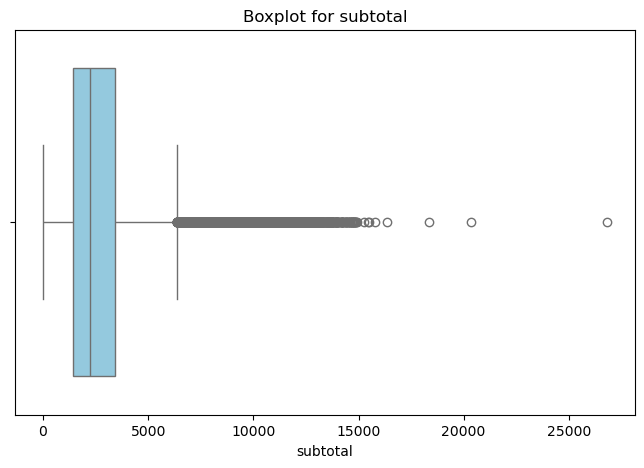

In [32]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_train['subtotal'], color='skyblue')
plt.title('Boxplot for subtotal')
plt.xlabel('subtotal')
plt.show()

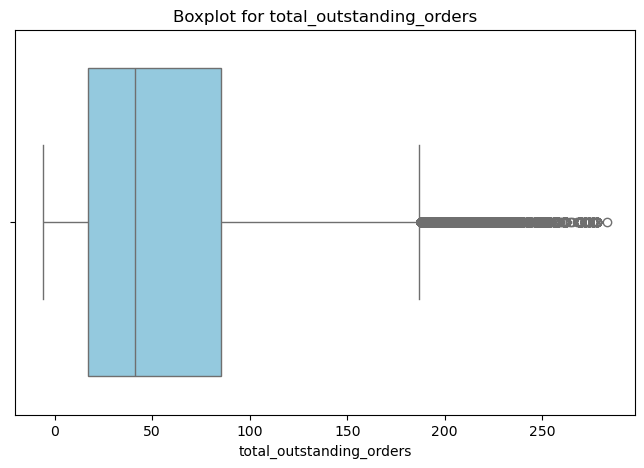

In [33]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_train['total_outstanding_orders'], color='skyblue')
plt.title('Boxplot for total_outstanding_orders')
plt.xlabel('total_outstanding_orders')
plt.show()

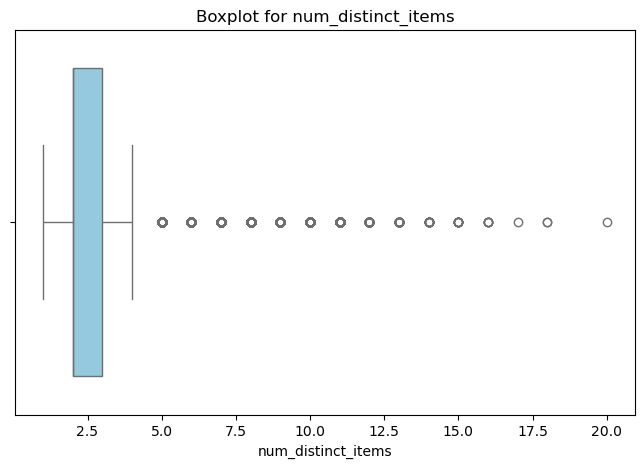

In [34]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_train['num_distinct_items'], color='skyblue')
plt.title('Boxplot for num_distinct_items')
plt.xlabel('num_distinct_items')
plt.show()

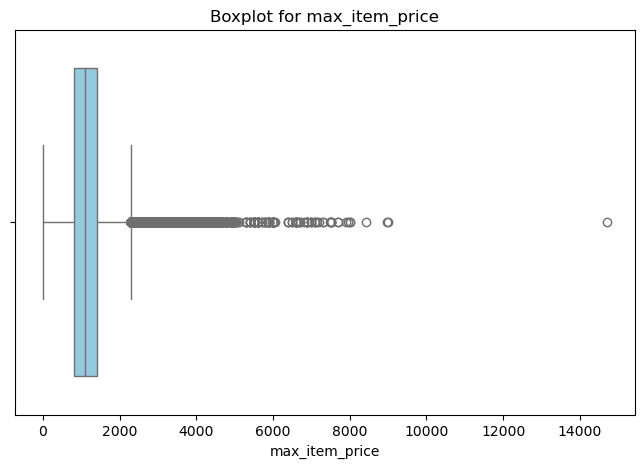

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_train['max_item_price'], color='skyblue')
plt.title('Boxplot for max_item_price')
plt.xlabel('max_item_price')
plt.show()

In [36]:
#Remove Outliers for the columns

In [37]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)  # 25th percentile
        Q3 = df[column].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove rows with outliers in the column
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

columns_to_clean = ['time_taken_minutes','distance','subtotal','total_outstanding_orders', 'num_distinct_items', 'max_item_price']

df_train = remove_outliers(df_train, columns_to_clean)

df_train.shape

(107057, 10)

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [38]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

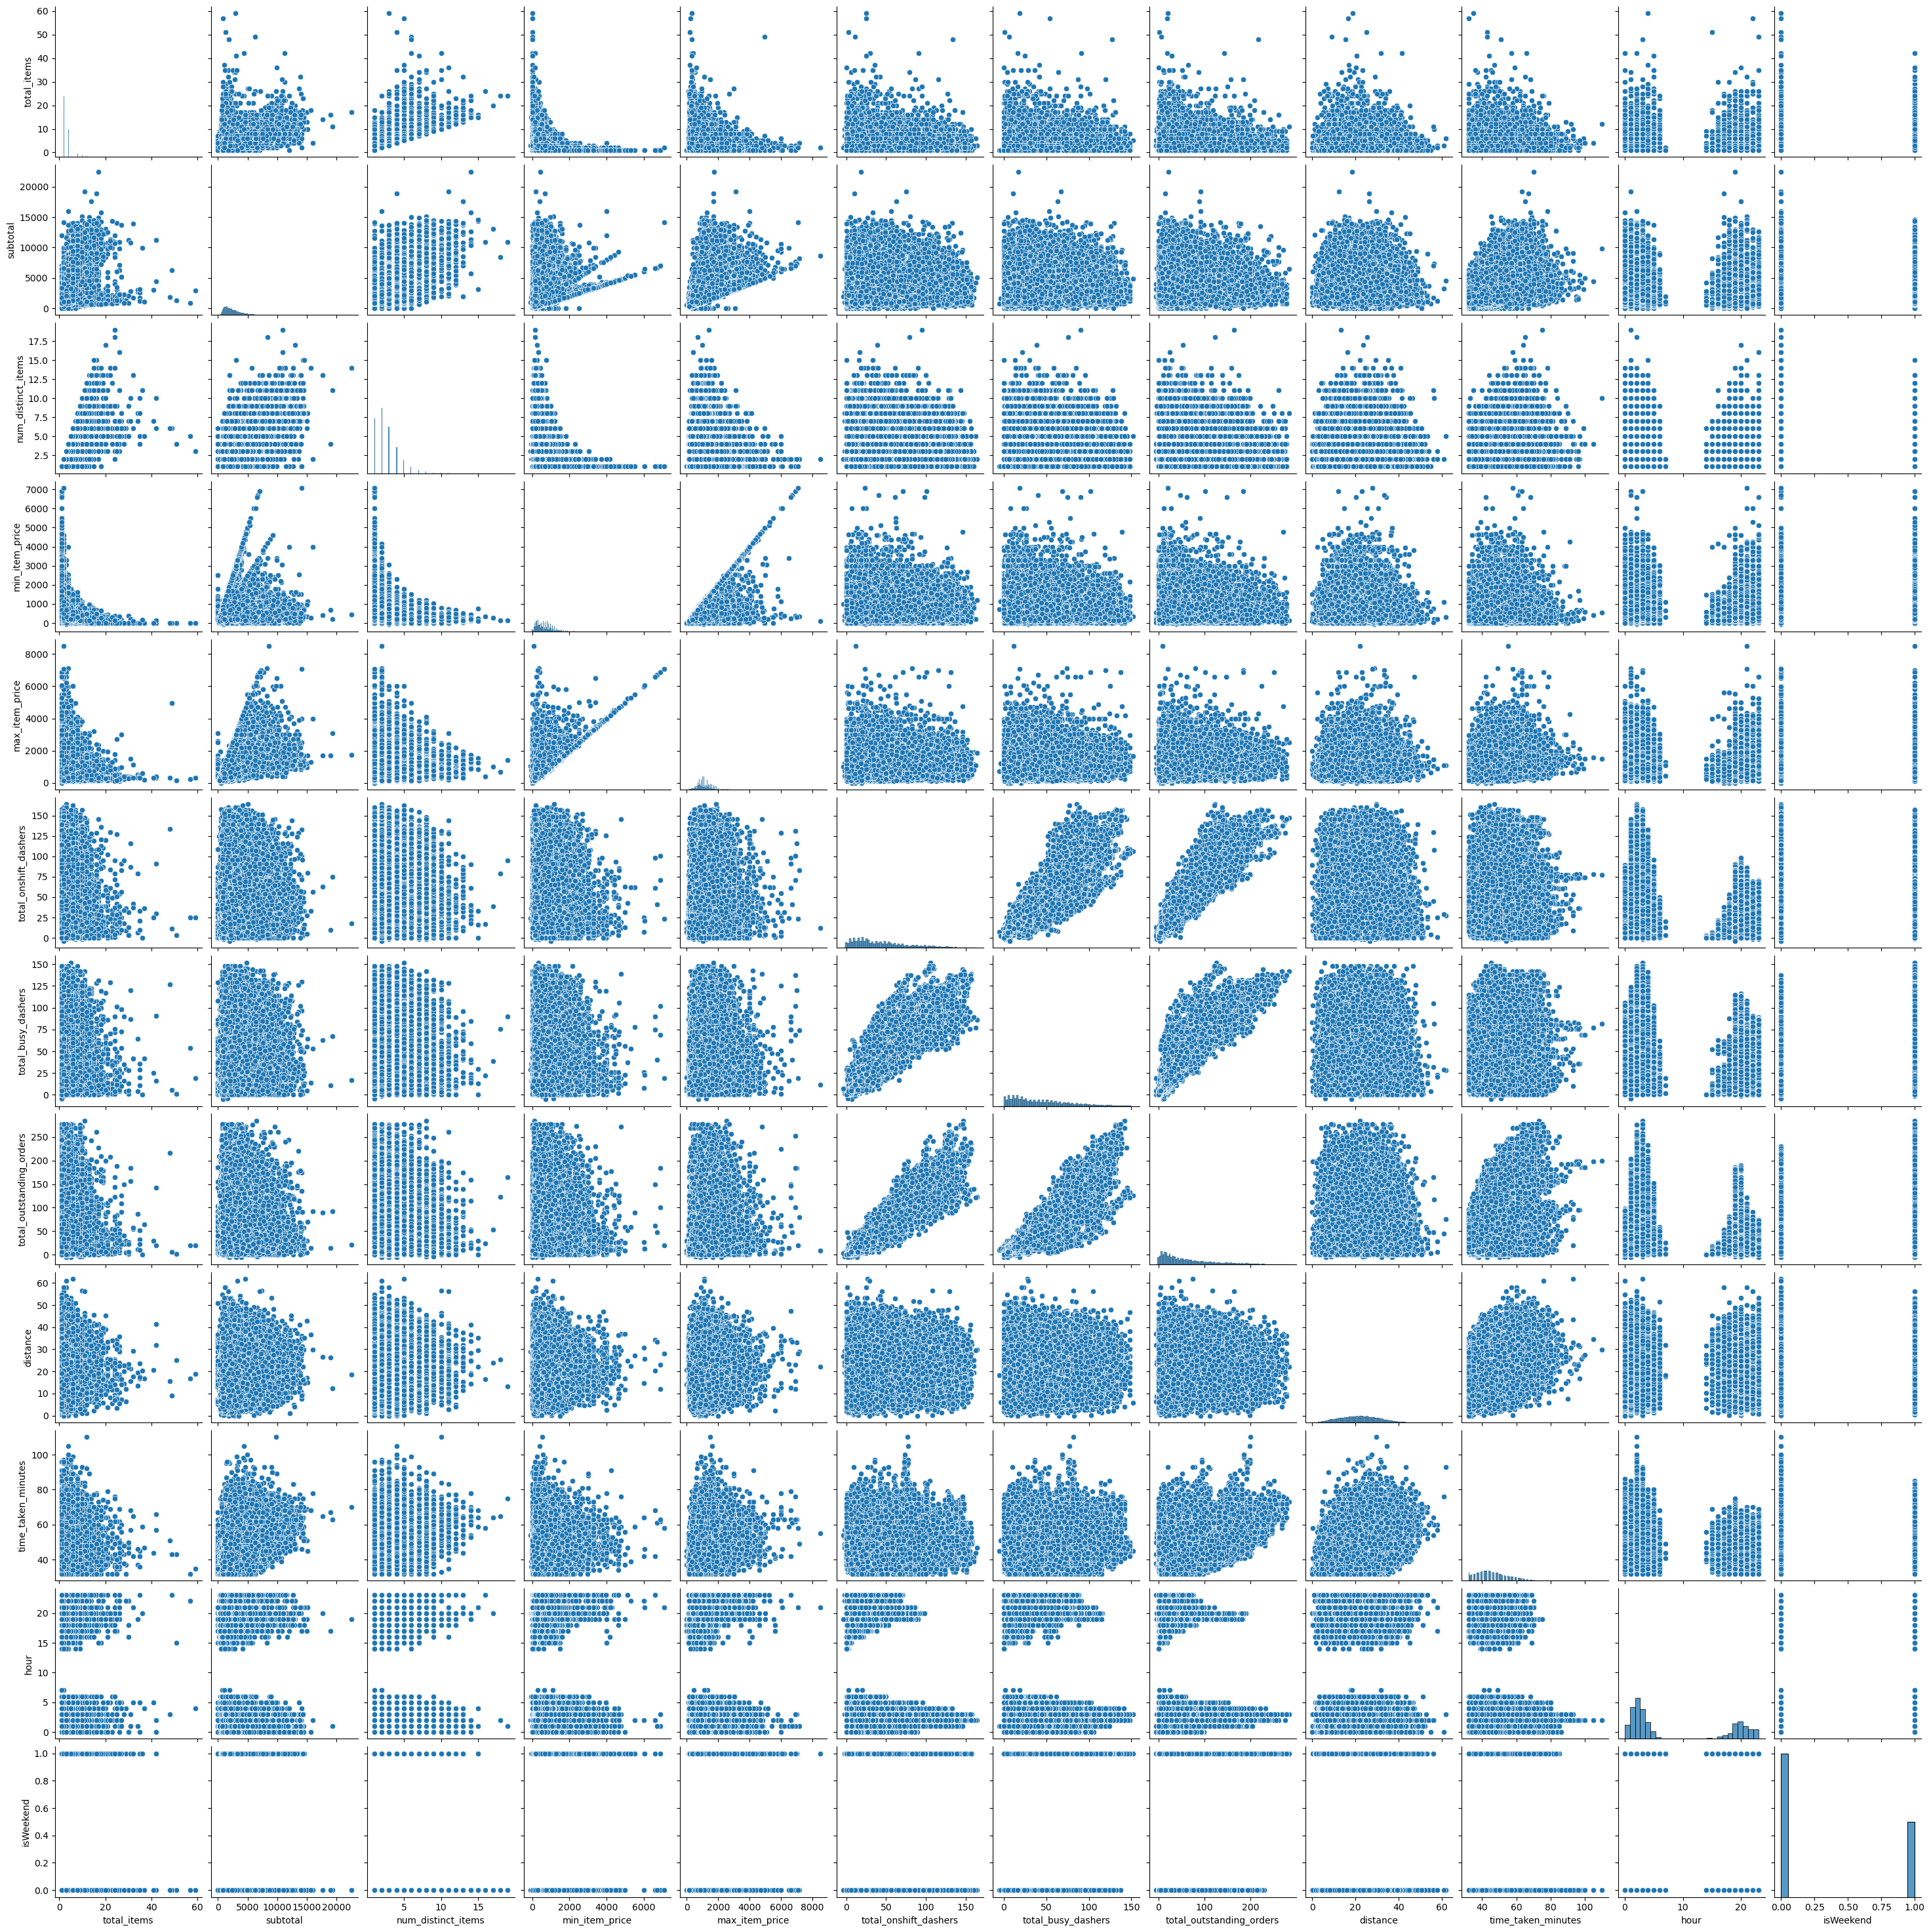

In [20]:
# Plot distributions for all numerical columns
# Plot distributions for all numerical columns
sns.pairplot(data=df_test)
plt.show()


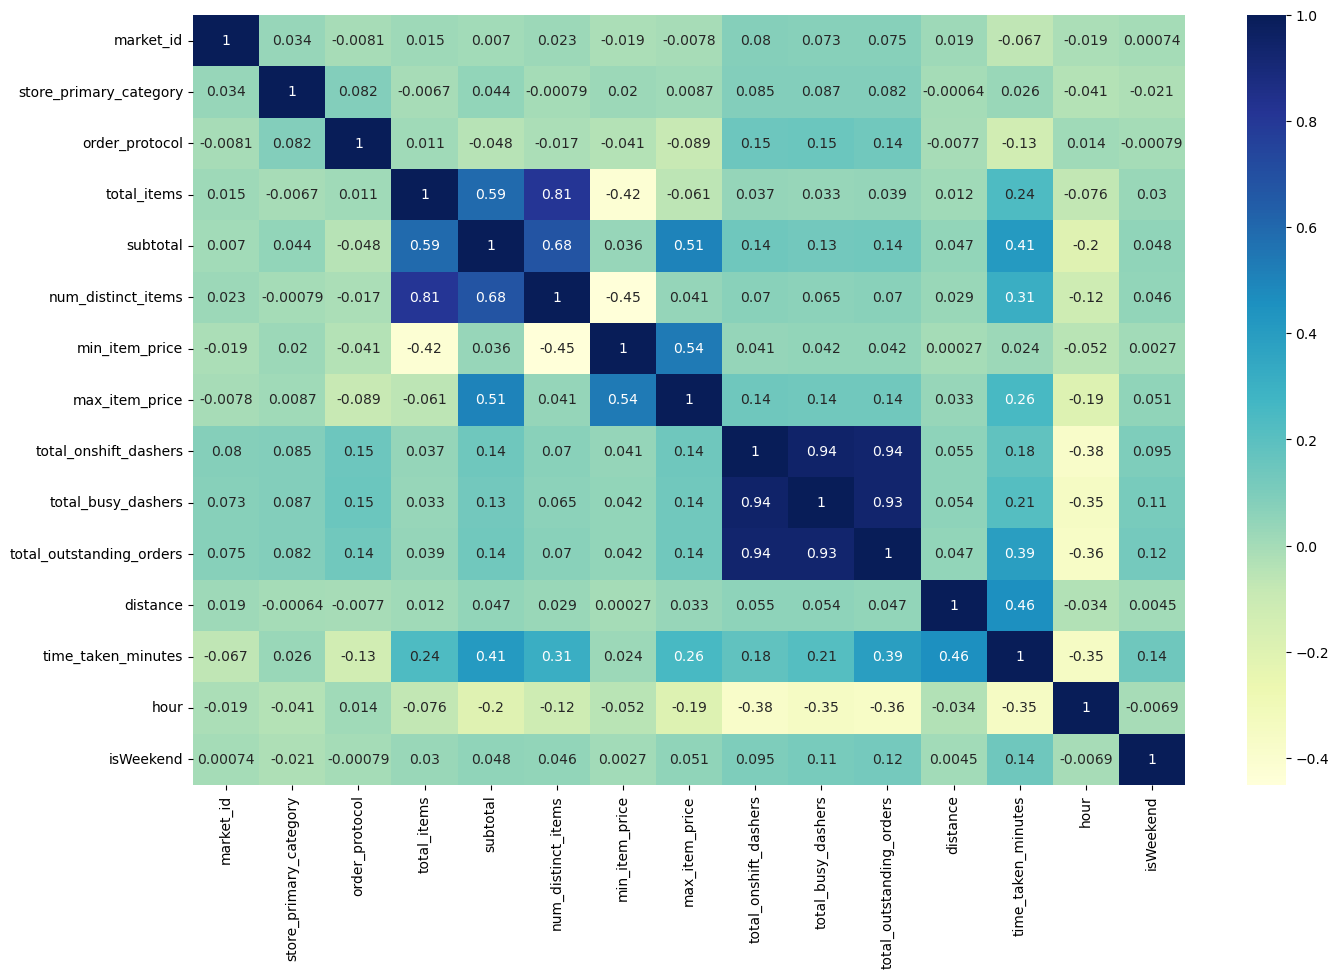

In [21]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_test.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### **4.1.2**
Check the distribution of categorical features

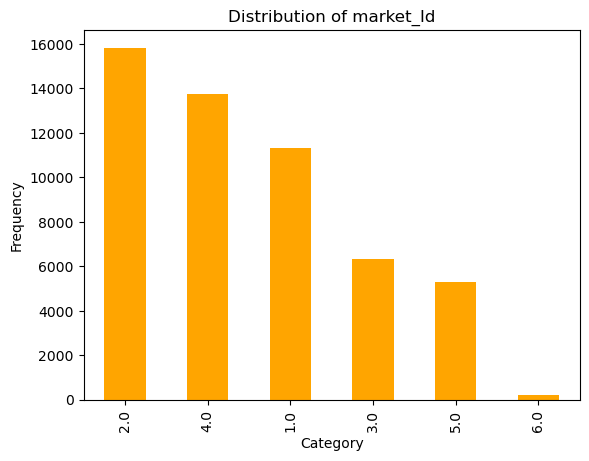

In [22]:
# Distribution of categorical columns

# Distribution of time_taken
df_test['market_id'].value_counts().plot(kind='bar', color='orange', title="Distribution of market_Id")
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

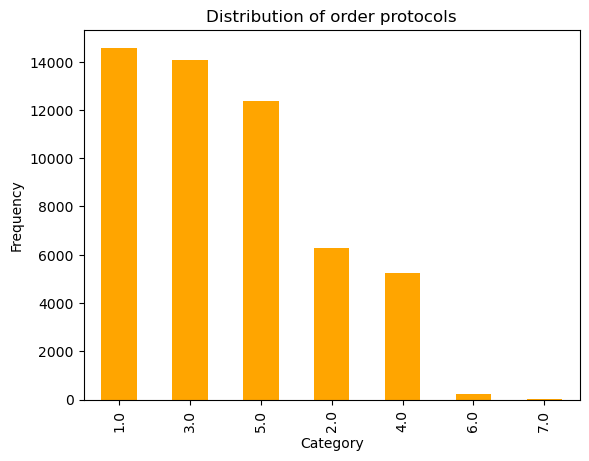

In [23]:
# Distribution of time_taken
df_test['order_protocol'].value_counts().plot(kind='bar', color='orange', title="Distribution of order protocols")
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

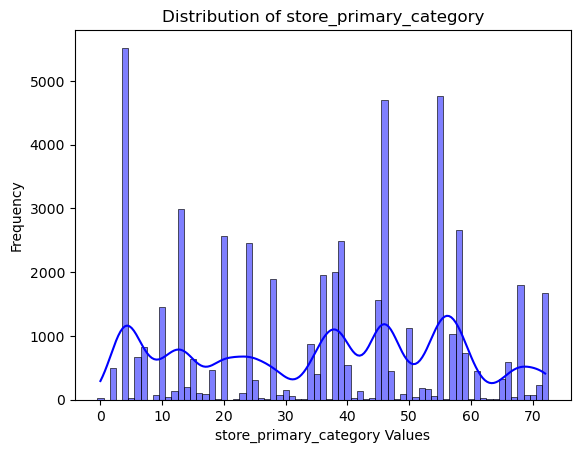

In [24]:
sns.histplot(df_test['store_primary_category'], kde=True, bins=20, color='blue')

# Add labels and title
plt.title('Distribution of store_primary_category')
plt.xlabel('store_primary_category Values')
plt.ylabel('Frequency')
plt.show()

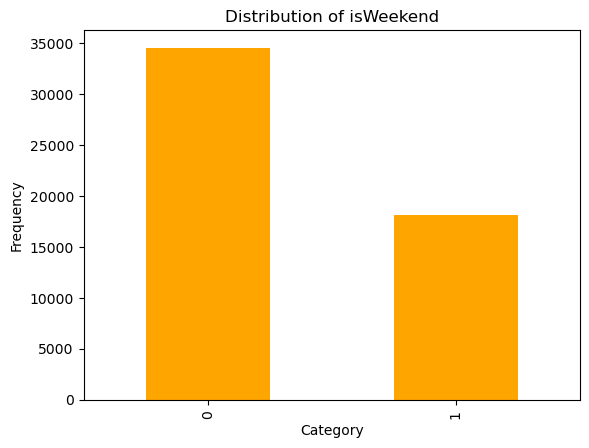

In [25]:
# Distribution of time_taken
df_test['isWeekend'].value_counts().plot(kind='bar', color='orange', title="Distribution of isWeekend")
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

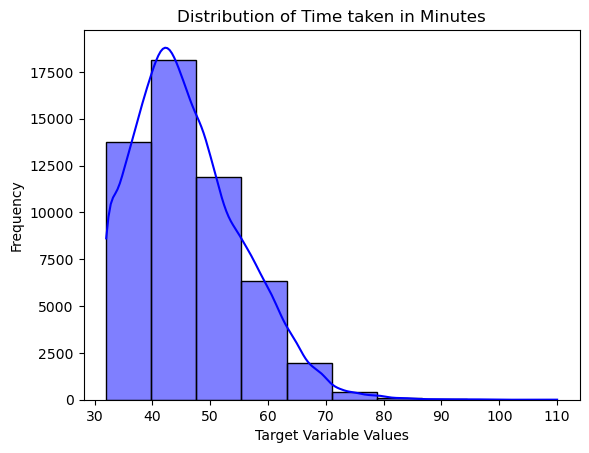

In [26]:
# Distribution of time_taken
sns.histplot(df_test['time_taken_minutes'], kde=True, bins=10, color='blue')

# Add labels and title
plt.title('Distribution of Time taken in Minutes')
plt.xlabel('Target Variable Values')
plt.ylabel('Frequency')
plt.show()


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

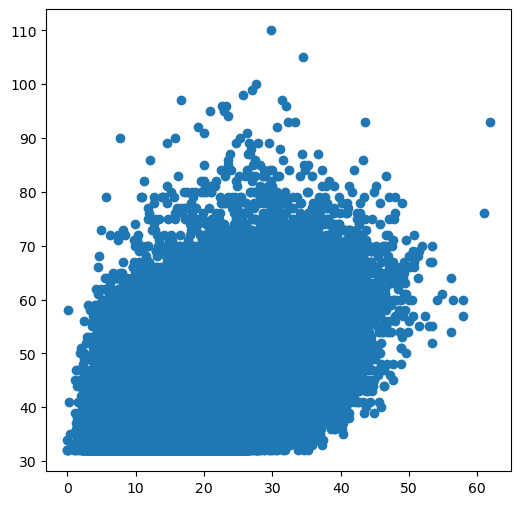

In [28]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=[6,6])
plt.scatter(df_test.distance, df_test.time_taken_minutes)
plt.show()


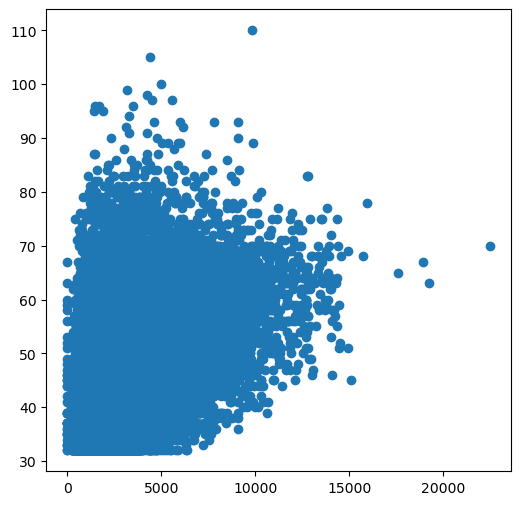

In [29]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=[6,6])
plt.scatter(df_test.subtotal, df_test.time_taken_minutes)
plt.show()

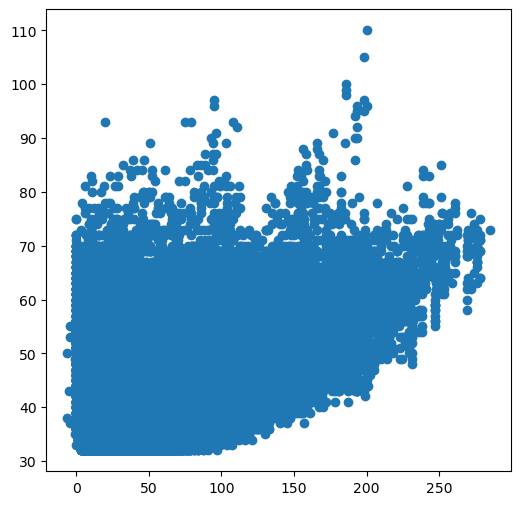

In [30]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=[6,6])
plt.scatter(df_test.total_outstanding_orders, df_test.time_taken_minutes)
plt.show()

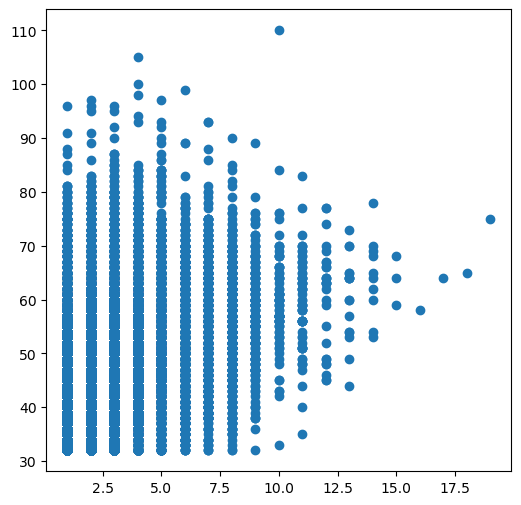

In [31]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=[6,6])
plt.scatter(df_test.num_distinct_items, df_test.time_taken_minutes)
plt.show()

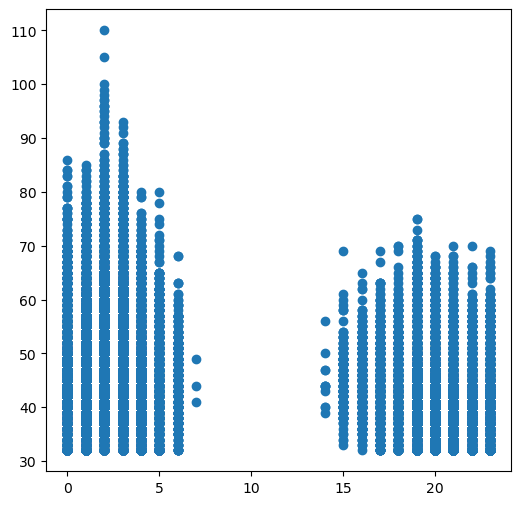

In [32]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=[6,6])
plt.scatter(df_test.hour, df_test.time_taken_minutes)
plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable


# Drop 3-5 weakly correlated columns from validation dataset
We can drop following elements from df_test. But I have dropped those in the upcoming model building
df_test = df_test.drop(columns=['market_id','store_primary_category','order_protocol','min_item_price','isWeekend'])
df_train.head()

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [44]:
df_train.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'time_taken_minutes', 'hour'],
      dtype='object')

In [45]:
# Import libraries
from sklearn.preprocessing import MinMaxScaler



#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [46]:
# Apply scaling to the numerical columns
varList=['total_items', 'subtotal', 'num_distinct_items', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'time_taken_minutes', 'hour']
scaler = MinMaxScaler()
df_train[varList] = scaler.fit_transform(df_train[varList])
df_test[varList] = scaler.fit_transform(df_test[varList])


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [47]:
y_train = df_train.pop('time_taken_minutes')
X_train = df_train

In [48]:
# Create/Initialise the model
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['distance']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const       0.065115
distance    0.568480
dtype: float64

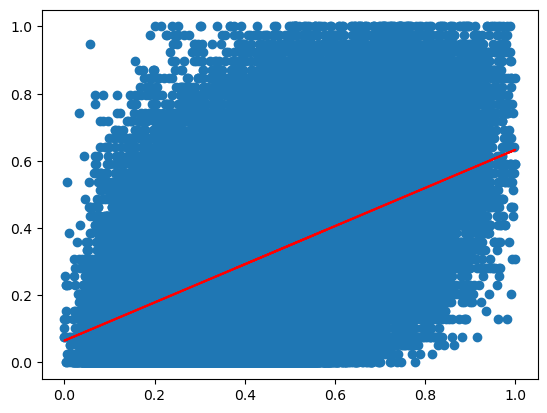

In [49]:
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.065 +0.568*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [50]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:     time_taken_minutes   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                 3.525e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        05:33:14   Log-Likelihood:                 30245.
No. Observations:              107057   AIC:                        -6.049e+04
Df Residuals:                  107055   BIC:                        -6.047e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0651      0.002     43.383      0.0

In [51]:
#Add more elements
X_train_lm = X_train[['distance', 'subtotal']]
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:     time_taken_minutes   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                 2.984e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        05:33:14   Log-Likelihood:                 38728.
No. Observations:              107057   AIC:                        -7.745e+04
Df Residuals:                  107054   BIC:                        -7.742e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0586      0.002    -35.320      0.0

In [52]:
#Add more elements
X_train_lm = X_train[['distance', 'subtotal','total_outstanding_orders']]
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:     time_taken_minutes   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                 2.462e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        05:33:14   Log-Likelihood:                 43099.
No. Observations:              107057   AIC:                        -8.619e+04
Df Residuals:                  107053   BIC:                        -8.615e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [53]:
#Add more elements
X_train_lm = X_train[['distance', 'subtotal','total_outstanding_orders','num_distinct_items']]
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:     time_taken_minutes   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                 1.868e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        05:33:14   Log-Likelihood:                 43353.
No. Observations:              107057   AIC:                        -8.670e+04
Df Residuals:                  107052   BIC:                        -8.665e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [54]:
#Add more elements
X_train_lm = X_train[['distance', 'subtotal','total_outstanding_orders','num_distinct_items','max_item_price']]
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:     time_taken_minutes   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                 1.507e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        05:33:14   Log-Likelihood:                 43527.
No. Observations:              107057   AIC:                        -8.704e+04
Df Residuals:                  107051   BIC:                        -8.698e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [55]:
#Add more elements
X_train_lm = X_train[['distance', 'subtotal','total_outstanding_orders','num_distinct_items','max_item_price','total_items']]
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:     time_taken_minutes   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                 1.256e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        05:33:14   Log-Likelihood:                 43532.
No. Observations:              107057   AIC:                        -8.705e+04
Df Residuals:                  107050   BIC:                        -8.698e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [56]:
df_train.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'hour'],
      dtype='object')

In [57]:
#Add more elements
X_train_lm = X_train[['distance', 'subtotal','total_outstanding_orders','num_distinct_items','max_item_price','total_items','total_busy_dashers']]
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:     time_taken_minutes   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                 2.403e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        05:33:15   Log-Likelihood:                 65564.
No. Observations:              107057   AIC:                        -1.311e+05
Df Residuals:                  107049   BIC:                        -1.310e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [58]:
#Add more elements
X_train_lm = X_train[['distance', 'subtotal','total_outstanding_orders','num_distinct_items','max_item_price','total_items','total_busy_dashers','total_onshift_dashers']]
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:     time_taken_minutes   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                 4.765e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        05:33:15   Log-Likelihood:                 96238.
No. Observations:              107057   AIC:                        -1.925e+05
Df Residuals:                  107048   BIC:                        -1.924e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [59]:
#Add more elements
X_train_lm = X_train[['distance', 'subtotal','total_outstanding_orders','num_distinct_items','max_item_price','total_items','total_busy_dashers','total_onshift_dashers','hour']]
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:     time_taken_minutes   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                 6.021e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        05:33:16   Log-Likelihood:             1.1147e+05
No. Observations:              107057   AIC:                        -2.229e+05
Df Residuals:                  107047   BIC:                        -2.228e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [62]:
X_train.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'hour'],
      dtype='object')

In [70]:
y_train_time = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

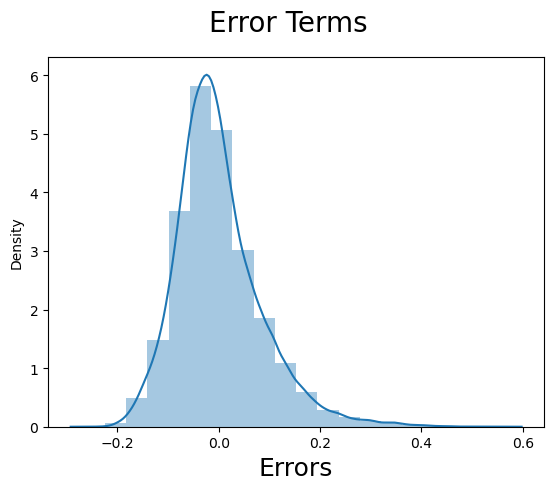

In [71]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_time), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [72]:

y_test = df_test.pop('time_taken_minutes')
X_test = df_test

In [73]:
X_test_m4 = sm.add_constant(X_test)

In [75]:
X_train.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'hour'],
      dtype='object')

In [76]:
X_test.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'hour', 'isWeekend'],
      dtype='object')

In [77]:
X_test_m4 = X_test_m4.drop(["market_id", "store_primary_category", "order_protocol","isWeekend","min_item_price"], axis = 1)

In [78]:
y_pred_m4 = lr.predict(X_test_m4)

Text(0, 0.5, 'y_pred')

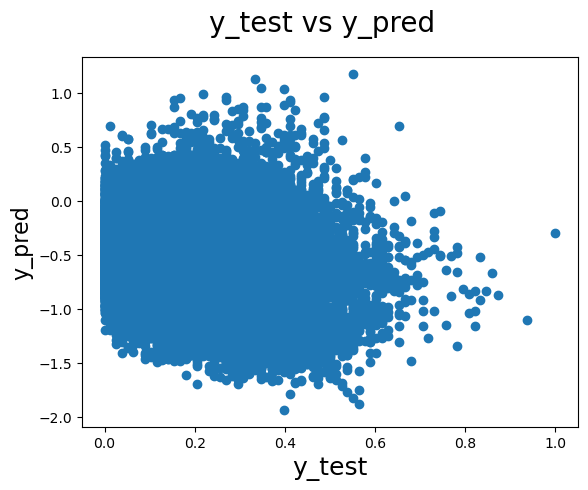

In [79]:
# Find results for evaluation metrics

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [80]:
# Loop through the number of features and test the model
#Calculate Model VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features    VIF
4     total_onshift_dashers  31.38
5        total_busy_dashers  29.75
6  total_outstanding_orders  25.51
1                  subtotal  13.41
3            max_item_price  11.47
2        num_distinct_items   5.80
7                  distance   5.35
0               total_items   3.02
8                      hour   1.93

In [94]:
#Drop the variables having high VIF
X1 = X_train.drop('total_onshift_dashers', axis=1)

In [95]:
X1.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'max_item_price',
       'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour'],
      dtype='object')

In [96]:
# Build a fitted model
X_train_lm = sm.add_constant(X1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:     time_taken_minutes   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                 2.467e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        06:26:17   Log-Likelihood:                 70948.
No. Observations:              107057   AIC:                        -1.419e+05
Df Residuals:                  107048   BIC:                        -1.418e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [98]:
#Calculate Model VIF
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
4        total_busy_dashers  21.79
5  total_outstanding_orders  19.26
1                  subtotal  13.41
3            max_item_price  11.44
2        num_distinct_items   5.79
6                  distance   5.32
0               total_items   3.02
7                      hour   1.92

In [87]:
X.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'max_item_price',
       'total_onshift_dashers', 'total_outstanding_orders', 'distance',
       'hour'],
      dtype='object')

In [99]:
X2 = X_train.drop('total_busy_dashers', axis=1)
# Build a fitted model
X_train_lm = sm.add_constant(X2)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.params
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:     time_taken_minutes   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                 5.608e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        06:29:05   Log-Likelihood:             1.0317e+05
No. Observations:              107057   AIC:                        -2.063e+05
Df Residuals:                  107048   BIC:                        -2.062e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [102]:
X2.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'max_item_price',
       'total_onshift_dashers', 'total_outstanding_orders', 'distance',
       'hour'],
      dtype='object')

In [103]:

X4 = X2.drop('total_outstanding_orders', axis=1)

# Build a fitted model
X_train_lm = sm.add_constant(X4)
lr_4 = sm.OLS(y_train, X_train_lm).fit()
lr_4.params
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:     time_taken_minutes   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                 1.173e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        06:32:31   Log-Likelihood:                 45491.
No. Observations:              107057   AIC:                        -9.097e+04
Df Residuals:                  107049   BIC:                        -9.089e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.03

In [100]:
X3 = X2.drop('total_onshift_dashers', axis=1)

# Build a fitted model
X_train_lm = sm.add_constant(X3)
lr_3 = sm.OLS(y_train, X_train_lm).fit()
lr_3.params
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:     time_taken_minutes   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                 1.239e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        06:30:51   Log-Likelihood:                 46771.
No. Observations:              107057   AIC:                        -9.353e+04
Df Residuals:                  107049   BIC:                        -9.345e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Final Model : 

In [105]:
# Build the final model with selected number of features
#Looking to the REF values , If we try to remove the REF is high feature then R2 is decreasing trementously . So mu Final model is 
lr_2.params
print(lr_2.summary())


                            OLS Regression Results                            
Dep. Variable:     time_taken_minutes   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                 5.608e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        06:35:42   Log-Likelihood:             1.0317e+05
No. Observations:              107057   AIC:                        -2.063e+05
Df Residuals:                  107048   BIC:                        -2.062e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [108]:
X_train_lm = sm.add_constant(X2)

In [109]:
y_train_time_taken = lr_2.predict(X_train_lm)

In [111]:
df_test.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'hour', 'isWeekend'],
      dtype='object')

In [112]:
X_test.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'hour', 'isWeekend'],
      dtype='object')

In [113]:
X_test_m2=sm.add_constant(X_test)
X_test_m2 = X_test_m2.drop(["market_id", "store_primary_category", "order_protocol","isWeekend","min_item_price","total_busy_dashers"], axis = 1)

In [114]:
y_pred_m2 = lr_2.predict(X_test_m2)

Text(0, 0.5, 'y_pred')

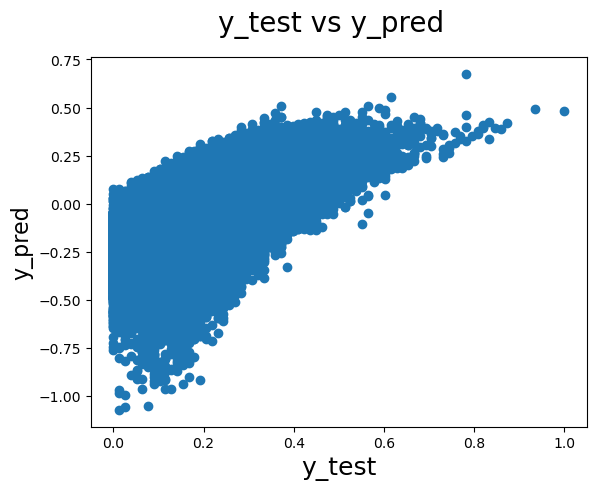

In [115]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m2)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

Text(0.5, 0, 'Errors')

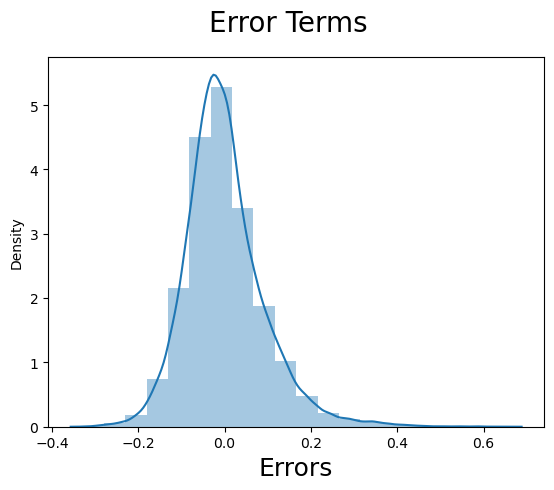

In [110]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_time_taken), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [117]:
# Compare the scaled vs unscaled features used in the final model

# View scaled coefficients
scaled_coefficients = lr_2.params
print("Scaled Coefficients:\n", scaled_coefficients)

# To reverse scaling (assuming StandardScaler was used for feature scaling)
unscaled_coefficients = scaled_coefficients * X_train.std(axis=0)
print("Unscaled Coefficients:\n", unscaled_coefficients)

# Rank features based on importance
feature_importance = abs(scaled_coefficients)
print("Feature Importance:\n", feature_importance.sort_values(ascending=False))

Scaled Coefficients:
 const                       0.038348
total_items                -0.466968
subtotal                    0.210554
num_distinct_items          0.074717
max_item_price              0.047288
total_onshift_dashers      -1.933623
total_outstanding_orders    1.509232
distance                    0.566591
hour                       -0.143568
dtype: float64
Unscaled Coefficients:
 const                            NaN
distance                    0.104329
hour                       -0.054974
max_item_price              0.008532
num_distinct_items          0.018968
subtotal                    0.041328
total_busy_dashers               NaN
total_items                -0.002643
total_onshift_dashers      -0.353419
total_outstanding_orders    0.358774
dtype: float64
Feature Importance:
 total_onshift_dashers       1.933623
total_outstanding_orders    1.509232
distance                    0.566591
total_items                 0.466968
subtotal                    0.210554
hour           

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'
For 'total_items' scaled coeffiecient -0.466 and unscaled is -0.0026 , It imcreasess in sclaed


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**



>Yes there are 3 categorical variables and those are : 1. market_id, 2.order_protocol, 3.store_primary_category
These all three are less corelated , meaning there is no high impact on final variable if these variables increased or decreased




---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>


Answer : It means take 80% of sample data to train the model and 20% sample data te test the model



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>


Answer : Distance is having higly corelated with time taken to fullfil the order. It is 46% correlated.
---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>


While doing outliers detections I followed below steps :
1.Plot boxplot or scatter plot
2.Find out the outliersswhich are outside the interquartile range (IQR). 
3.Remove those outliers



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>


Answer : 
1. total_onshift_dashers(This is negatively corelated , meaning increase in total_onshift_dashers will decrease the time_taken)
2. total_outstanding_orders
3. distance



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>
Linear regression is an algorithm that provides a linear relationship between an independent variable and a dependent variable to predict the outcome of future events. It is a statistical method used in data science and machine learning for predictive analysis.
>The independent variable is also the predictor or explanatory variable that remains unchanged due to the change in other variables. However, the dependent variable changes with fluctuations in the independent variable. The regression model predicts the value of the dependent variable, which is the response or outcome variable being analyzed or studied.
Thus, linear regression is a supervised learning algorithm that simulates a mathematical relationship between variables and makes predictions for continuous or numeric variables such as sales, salary, age, product price, etc.
This analysis method is advantageous when at least two variables are available in the data, as observed in stock market forecasting, portfolio management, scientific analysis, etc.
>There are two types of linear regression:
>1. Simple Linear Regression : where only one independent variable involve
>2. Multiple Linear Regression : where multple independent variables involve
>   General expression is : Y=MX1+MX2+...MXn + C , where X1,X2...Xn are independent variables , y dependet variable , C is constant and M is slope
>The aim of Linear regression is find the best fitted line among the dataset using above expression
Steps involves :
1.Import the required libraries
2.Perform data cleaning
3.Perform EDA
4.Split the data into train and test
5.Find out the best fitted model using test and train data
6.Perfome RFA
7.Perform Residual Analysis
8.Train the model using train dataset
9.Test the model usong testdata set



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>Linear Regression :
Linear regression is a statistical method used to model the relationship between a dependent variable and one independent variable.
It can be expressed as y=MX +C , where y=dependent variable , X=independent variable and C is constant , M is slope


Multiple Linear Regression :
Multiple Linear regression is a statistical method used to model the relationship between a dependent variable and multiple independent variables.
It can be expressed as y=MX1+MX2+...+MXn+C , where y=dependent variable , X1,X2....Xn=independent variables and C is constant , M is slope



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
In linear regression, the cost function is a crucial concept. Its main role is to measure the error or discrepancy between the predicted values (from the model) and the actual values (from the dataset). Essentially, it's a mathematical tool that evaluates how well the model's predictions align with the real data.
Common Cost Function: Mean Squared Error (MSE)
The most commonly used cost function in linear regression is the Mean Squared Error (MSE). It is defined as: 
MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 $$ Where:
yi=Actual value for the ith observation
n=no of observations
hat{y}=predicted value for ith observations
It can be minimize using :
1. Gradient Descent
2. Analytical Solution (for OLS)



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting :
A model is said to be overfitting when it learns not only the underlying patterns in the training data but also the noise or random fluctuations. As a result, the model performs exceptionally well on the training set but poorly on the test (or unseen) data.The model focuses too much on the training data and loses generalization.
>This cause :
>1.The model is too complex (e.g., too many features or parameters).
>2. Insufficient training data relative to model complexity.

Underfitting : Underfitting occurs when a model is too simple to capture the underlying patterns in the training data. It fails to perform well on both training data and test data.The model doesn't learn enough from the training data and performs poorly overall.
It causes :
1. The model is too simple (e.g., linear model for highly nonlinear data).
2. Insufficient features or ignoring significant relationships.
3. Inadequate training time or improper hyperparameter tuning.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual plots are a powerful diagnostic tool in linear regression that help assess the model's assumptions and identify potential issues. Here's how they assist in diagnosing the model:

1. Check for Linearity
Residual plots display the residuals (errors) on the y-axis and the predicted values (or one of the predictors) on the x-axis.
If the linearity assumption holds, the residuals should scatter randomly around zero with no discernible pattern.
A curved or systematic pattern suggests the relationship between the predictors and the target variable may not be linear, indicating the need for transformations or a more complex model.

2. Identify Homoscedasticity (Constant Variance)
Homoscedasticity means the variance of residuals should remain constant across all levels of the predictor(s).
In the residual plot, this appears as a consistent spread of points around the zero line.
If the plot shows a "funnel" shape (i.e., residuals spread out or narrow as the predicted values increase), it indicates heteroscedasticity, which may require transforming the target variable or using weighted regression.

3. Detect Autocorrelation
Residuals should be independent of each other. In time-series data, for instance, residuals should not show patterns or trends.

If the residual plot shows clustering or patterns, it suggests autocorrelation, which may need addressing with time-series-specific methods (e.g., ARIMA models).

4. Spot Outliers and Influential Points
Outliers are observations with residuals far from zero, which may unduly influence the model.

Observing unusually large residuals in the plot can help identify such points for further investigation.

5. Normality of Residuals
While not a direct use of the residual plot, evaluating whether residuals are normally distributed is another diagnostic step (e.g., with a histogram or Q-Q plot).

This is important if you plan to conduct hypothesis tests or calculate confidence intervals.